In [13]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

torch.__version__, np.__version__

('1.12.0+cpu', '1.23.3')

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

import Dataset

In [3]:
import requests
import zipfile
import os

# Setup path to data folder
data_path = 'data'
image_path = os.path.join(data_path, 'pizza_steak_sushi')

# If the image folder doesn't exist, download it and prepare it... 
if os.path.exists(image_path):
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    os.makedirs(image_path, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(image_path + '.zip', "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(image_path + '.zip', "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory exists.


Become with the data

In [4]:
for dirpath, dirnames, filenames in os.walk(data_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [5]:
# setup train and test path
train_path = os.path.join(image_path, 'train')
test_path = os.path.join(image_path, 'test')

512 384


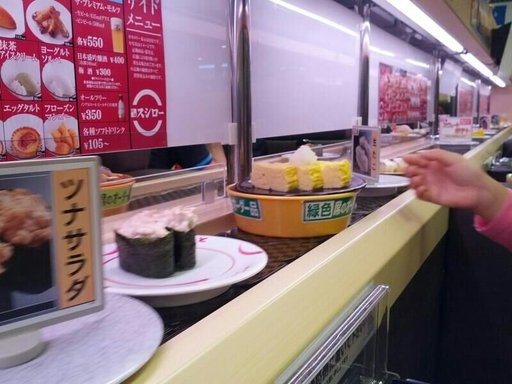

In [6]:
#visulize images
from PIL import Image

pizza_image_path = [ os.path.join(image_path,'train','pizza', i) for i in os.listdir(os.path.join(train_path, 'pizza')) ]
steak_image_path = [ os.path.join(image_path,'train','steak', i) for i in os.listdir(os.path.join(train_path, 'steak')) ]
sushi_image_path = [ os.path.join(image_path,'train','sushi', i) for i in os.listdir(os.path.join(train_path, 'sushi')) ]

#Open image
img = Image.open(sushi_image_path[30])
print(img.width, img.height)
img

## Transforming data
turn images to numbers

In [20]:
data_transform_train = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5), # flip images 50% randomly (horizontal) 
    transforms.ToTensor() # this also converts [0,255] -> [0,1]
])

data_transform_test = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor() # this also converts [0,255] -> [0,1]
])

In [21]:
train_images = datasets.ImageFolder(root=train_path, transform=data_transform_train, target_transform=None)
test_images = datasets.ImageFolder(root=test_path, transform=data_transform_test, target_transform=None)

print(f"Train data:\n{train_images}\nTest data:\n{test_images}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )


In [22]:
# get class names
class_names = train_images.classes
class_dict = train_images.class_to_idx
class_names, class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [23]:
len(train_images), len(test_images)

(225, 75)

Turn loaded images into DataLoader's

In [24]:
train_dataloader = DataLoader(dataset=train_images, batch_size=32, num_workers=os.cpu_count(), shuffle=True)
test_dataloader = DataLoader(dataset=test_images, batch_size=32, num_workers=os.cpu_count(), shuffle=False)

In [25]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [26]:
class_names

['pizza', 'steak', 'sushi']

In [54]:
# create function to display random images

def display_random_images(dataset, class_names, n, display_shape, seed) :
    
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
        
    # 3. Set random seed
    if seed:
        np.random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = np.random.permutation((len(dataset)))[:n]

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0) # switch channel to the last order

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if class_names:
            title = f"class: {class_names[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

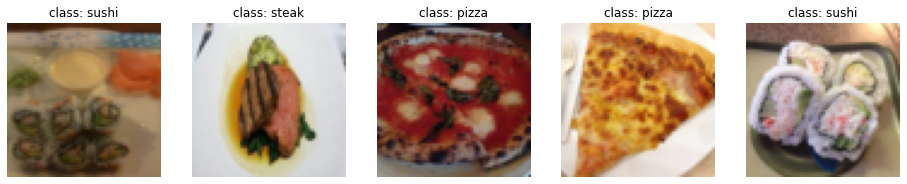

In [76]:
display_random_images(train_images, 
                      n=5, 
                      class_names=class_names,
                      display_shape=False,
                      seed=None)

In [90]:
# create tinyVgg model
class TinyVGG(nn.Module) :
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) 
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x

In [91]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_images.classes)).to(device)
model_0.forward(img) # let's see what should use shape for each layers 

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])


tensor([[0.0638, 0.0593, 0.0398],
        [0.0635, 0.0664, 0.0388],
        [0.0687, 0.0646, 0.0417],
        [0.0566, 0.0576, 0.0351],
        [0.0667, 0.0605, 0.0395],
        [0.0738, 0.0627, 0.0442],
        [0.0610, 0.0599, 0.0372],
        [0.0625, 0.0579, 0.0378],
        [0.0641, 0.0650, 0.0380],
        [0.0639, 0.0597, 0.0395],
        [0.0628, 0.0627, 0.0383],
        [0.0689, 0.0657, 0.0402],
        [0.0649, 0.0659, 0.0411],
        [0.0681, 0.0658, 0.0401],
        [0.0673, 0.0640, 0.0352],
        [0.0600, 0.0616, 0.0376],
        [0.0598, 0.0601, 0.0385],
        [0.0667, 0.0671, 0.0372],
        [0.0638, 0.0637, 0.0406],
        [0.0608, 0.0599, 0.0387],
        [0.0632, 0.0594, 0.0441],
        [0.0650, 0.0594, 0.0392],
        [0.0624, 0.0591, 0.0388],
        [0.0619, 0.0595, 0.0367],
        [0.0724, 0.0672, 0.0364],
        [0.0584, 0.0635, 0.0396],
        [0.0667, 0.0637, 0.0379],
        [0.0672, 0.0671, 0.0383],
        [0.0614, 0.0637, 0.0362],
        [0.060

https://www.learnpytorch.io/04_pytorch_custom_datasets/#75-create-train-test-loop-functions